In [21]:
from utility import parse

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory analisys (and preliminary cleaning)
In this phase I try to familiarize with the dataset and its problems, like missing data and so on.

In [22]:
df = pd.DataFrame(list(parse('amz_products_small.jsonl.gz')))

In [23]:
display(df)

,also_buy,also_view,asin,brand,category,description,feature,image,price,title,main_cat
0,[],[],B00ADZ3WUM,NSI,"[Automotive, Exterior Accessories, Bumper Stic...",[Bumpersticker: A day without sunshine is like...,[Official Licensed Die-Cut Sticker Designed by...,[],$4.68,"NSI - A Day Without Sunshine is Like, Well, Ni...",Automotive
1,[],[],B005VII5IU,General Motors,"[Automotive, Replacement Parts, Body & Trim, B...",[This is the official Genuine General Motors P...,[This is the official Genuine General Motors P...,[],$213.16,Genuine GM Parts 10341533 Rear Bumper Valance ...,Automotive
2,[],[],B001QTEKVO,JLM,"[Automotive, Lights & Lighting Accessories, Li...",[HID Xenon lights are designed to be at least ...,"[Will run for approx 2500 hours, Produces 2 to...",[https://images-na.ssl-images-amazon.com/image...,,JLM HID Conversion Kit H13 (9008) Dual Tube B...,Automotive
3,[],"[B007KLMLRM, B007KLMNNE, B0085FOJ90, B0085FOAW...",B00HWI43Q0,Spec-D Tuning,"[Automotive, Lights & Lighting Accessories, Li...",[Brand new in original packaging. Exactly the ...,[Features 1 pair of Red & Smoked lens Tail Lig...,[https://images-na.ssl-images-amazon.com/image...,$8.63,Spec-D Tuning LT-E362RG-F2-APC New 3D Light Ba...,Automotive
4,[],[],B0050VHRFK,Oracle Lighting,"[Automotive, Replacement Parts, Switches & Rel...",[Oracle Flush LED switches combines styling an...,"[Heavy stainless steel construction, LED illum...",[https://images-na.ssl-images-amazon.com/image...,$19.95,Oracle Lighting LSGQ16FW White LED On/Off Flus...,Automotive
...,...,...,...,...,...,...,...,...,...,...,...
1248412,[],[],B00CLBJS68,Filemaker,"[Software, Programming & Web Development, Data...",[Filemaker Pro 12 Np Edu Train Series Dvd],[],[],,FileMaker Pro - ( v. 12 ) - complete packag,All Electronics
1248413,[],[B07FPGPVH5],B00CNLGPMQ,Sage,"[Software, Business & Office, Office Suites]","[<div class=""aplus""> <div class=""three-fourth...","[Organize your finances, Pay bills and get pai...",[],$299.95,Sage 50 Pro Accounting 2014 US Edition,All Electronics
1248414,[],[],B00EVOU7FO,McAfee,"[Software, Antivirus & Security, Internet Secu...","[Mcafee, Inc. Mis14edv1raa Mcafee Internet Sec...","[A quality product by MCAFEE, INC., A quality ...",[],$31.80,MFE INTERNET SECURITY 1PC 2014,All Electronics
1248415,[],[],B00MV94V76,YBS,"[Software, Business & Office, Document Managem...",[This Package includes ONLY the License Upgrad...,[Nuance Dragon Naturally Speaking Premium 13.0...,[],,YBS Nuance Dragon Naturally Speaking Premium 1...,All Electronics


In [5]:
print('The total number of rows and columns of the dataset is:', df.shape)

The total number of rows and columns of the database is: (1248417, 11)


In [6]:
duplicates_id = len(df) - df['asin'].nunique()
print('The number of duplicates product id is:', duplicates_id, '(', (duplicates_id/len(df))*100, '%)')

The number of duplicates product id is: 19319 ( 1.5474797283279547 %)


In [7]:
print('The number of distinct brand is:', df['brand'].nunique())

The number of distinct brand is: 269661


## Formatting missing values
Since '[]' and empty strings represent a NULL value, I prefer to convert everything to pd.NA

In [8]:
# convert the df to string so that it is easier to perform the cleaning of missing values
df = df.astype(str)
df = df.replace({'[]': pd.NA, '': pd.NA})
df.head()

,also_buy,also_view,asin,brand,category,description,feature,image,price,title,main_cat
0,<NA>,<NA>,B00ADZ3WUM,NSI,"['Automotive', 'Exterior Accessories', 'Bumper...",['Bumpersticker: A day without sunshine is lik...,['Official Licensed Die-Cut Sticker Designed b...,<NA>,$4.68,"NSI - A Day Without Sunshine is Like, Well, Ni...",Automotive
1,<NA>,<NA>,B005VII5IU,General Motors,"['Automotive', 'Replacement Parts', 'Body & Tr...",['This is the official Genuine General Motors ...,['This is the official Genuine General Motors ...,<NA>,$213.16,Genuine GM Parts 10341533 Rear Bumper Valance ...,Automotive
2,<NA>,<NA>,B001QTEKVO,JLM,"['Automotive', 'Lights & Lighting Accessories'...",['HID Xenon lights are designed to be at least...,"['Will run for approx 2500 hours', 'Produces 2...",['https://images-na.ssl-images-amazon.com/imag...,<NA>,JLM HID Conversion Kit H13 (9008) Dual Tube B...,Automotive
3,<NA>,"['B007KLMLRM', 'B007KLMNNE', 'B0085FOJ90', 'B0...",B00HWI43Q0,Spec-D Tuning,"['Automotive', 'Lights & Lighting Accessories'...",['Brand new in original packaging. Exactly the...,['Features 1 pair of Red & Smoked lens Tail Li...,['https://images-na.ssl-images-amazon.com/imag...,$8.63,Spec-D Tuning LT-E362RG-F2-APC New 3D Light Ba...,Automotive
4,<NA>,<NA>,B0050VHRFK,Oracle Lighting,"['Automotive', 'Replacement Parts', 'Switches ...",['Oracle Flush LED switches combines styling a...,"['Heavy stainless steel construction', 'LED il...",['https://images-na.ssl-images-amazon.com/imag...,$19.95,Oracle Lighting LSGQ16FW White LED On/Off Flus...,Automotive


In [88]:
missing_values = {
    'column_name': df.columns,
    'missing_values': df.isnull().sum(),
    'perc_missing_values': [(x / len(df)) * 100 for x in df.isnull().sum()]
}
missing_values = pd.DataFrame(missing_values)
missing_values = missing_values.reset_index(drop=True)
display(missing_values)

,column_name,missing_values,perc_missing_values
0,also_buy,906545,72.615560
1,also_view,823087,65.930454
2,asin,0,0.000000
3,brand,38388,3.074934
4,category,0,0.000000
5,description,0,0.000000
6,feature,370073,29.643380
7,image,614250,49.202310
8,price,593729,47.558548
9,title,26,0.002083


The high percentage of missing values in the fields ['also_buy', 'also_view', 'feature', 'image', 'price'] will make it difficult to use them as relevant feature in the model.

### Price column
Even though the price column present more than 44% of missing values, it could still be interesting to see some descriptive statistics of the only numerical feature

In [10]:
# convert the column to a numeric type to run some descriptive statistics
df['price'] = pd.to_numeric(df['price'].str.replace('$', ''), errors='coerce')

In [11]:
df['price'].describe()

count    654688.000000
mean         31.288952
std          63.095153
min           0.000000
25%           7.990000
50%          14.670000
75%          28.490000
max         999.990000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

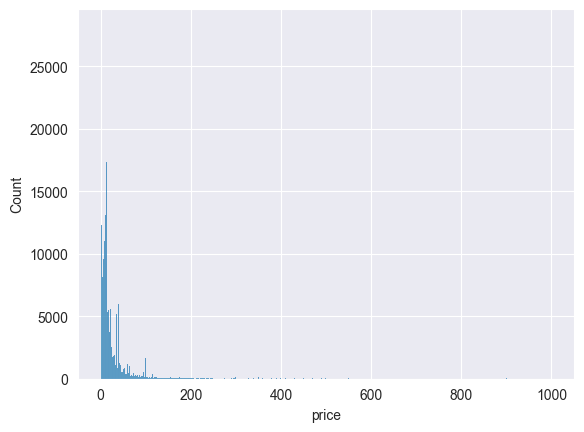

In [12]:
sns.histplot(df['price'])

The mean is 31.29 and the variance 63.10, indicating a relatively high degree of variability.
The minimum (0) and the maximum (999.99) values indicate that there might be some errors in the data point, but since the price column already has almost half of the values missing, there is no reason to investigate further.
The mean higher than the median suggest a skewness in the distribution, confirmed also by the long right tail in the plot.


In [108]:
average_price = df.groupby('main_cat')['price'].mean()
average_price = average_price.rename('average_price')
std_price = df.groupby('main_cat')['price'].std()
std_price = std_price.rename('std_price')
max_price = df.groupby('main_cat')['price'].max()
max_price = max_price.rename('max_price')

In [109]:
price_stats = pd.concat([average_price, std_price, max_price], axis=1, join='inner')

In [110]:
price_stats

,average_price,std_price,max_price
main_cat,,,
All Electronics,26.798779,65.355441,999.99
Amazon Fashion,41.752014,72.220821,999.99
Amazon Home,35.388535,64.537858,999.99
"Arts, Crafts & Sewing",14.960788,27.586232,999.99
Automotive,57.404865,92.685405,999.95
Books,17.326235,23.500652,989.95
Camera & Photo,37.703911,88.986369,999.99
Cell Phones & Accessories,13.489113,31.336567,999.99
Computers,25.595474,69.392913,999.99


9 categories out of 22 have a maximum price value of 999.99 dollar, suggesting that there might be some sort of max cap in the system for values higher than 1k. This is another reason that motivate the exclusion of the variable price in the model.

### Description column
Brief overview of the description column and the number of words contained in the rows

In [13]:
descriptions_length = df['description'].str.split().str.len()

In [14]:
descriptions_length.describe()

count    1.248417e+06
mean     9.409316e+01
std      1.265097e+02
min      1.000000e+00
25%      2.700000e+01
50%      6.100000e+01
75%      1.210000e+02
max      1.075000e+04
Name: description, dtype: float64

<Axes: xlabel='description', ylabel='Count'>

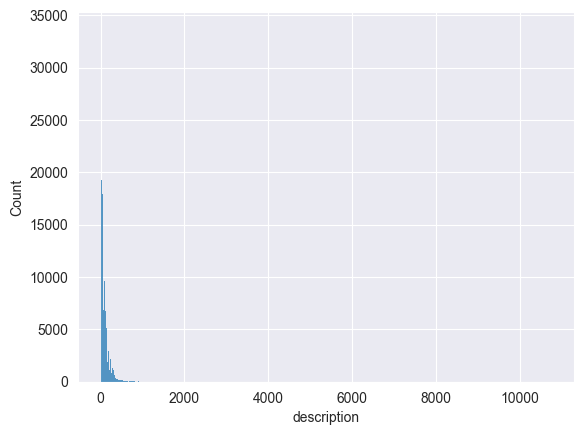

In [15]:
sns.histplot(descriptions_length)

The average number of words contained in the description field is 94, as for the price, the variance is relatively high as well.
The minimum value (1) could indicate the presence of some type of human error in the input of the data.
The maximum value compared to the 75% percentile suggest the presence of outliers

### Main category column
Analysis of the dependent variable

In [16]:
# convert the variable in categorical
df['main_cat'] = df['main_cat'].astype('category')

In [68]:
cat_value_count = df['main_cat'].value_counts(dropna=False)

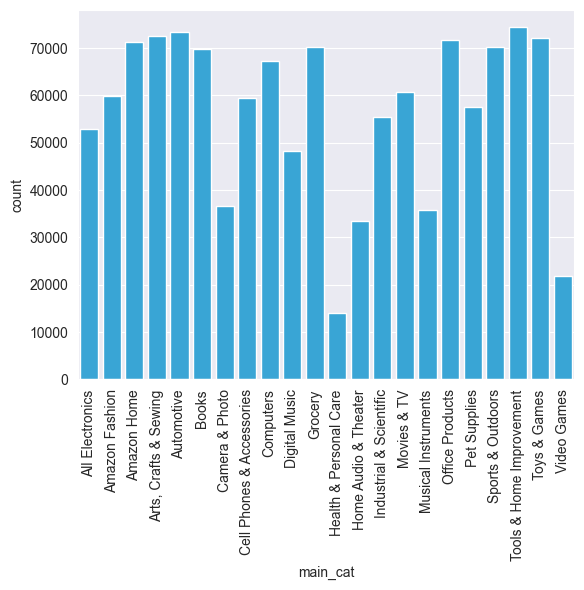

In [69]:
plot = sns.barplot(x = cat_value_count.index, y = cat_value_count, palette=['#1FAFEF'])
plt.xticks(rotation = 90)
plt.show()

In [77]:
# display the missing values for each category in percentage
grouped = df.groupby('main_cat')
grouped_df = {}
for cat, values in grouped:
    grouped_df[cat] = (values.isnull().sum() / (values.isnull().sum()+values.count()))*100
grouped_df = (pd.DataFrame(grouped_df)).transpose()
display(grouped_df)

,also_buy,also_view,asin,brand,category,description,feature,image,price,title,main_cat
All Electronics,84.502061,73.106018,0.0,0.060517,0.0,0.0,9.313892,40.305987,62.829532,0.000000,0.0
Amazon Fashion,81.716237,69.787604,0.0,28.873416,0.0,0.0,0.093729,23.206186,74.773629,0.000000,0.0
Amazon Home,85.834197,71.276029,0.0,0.468036,0.0,0.0,6.650598,50.082677,49.000869,0.001401,0.0
"Arts, Crafts & Sewing",60.976349,68.347208,0.0,0.213628,0.0,0.0,5.646673,54.899664,36.377419,0.000000,0.0
Automotive,80.229866,76.000218,0.0,0.078982,0.0,0.0,5.091647,47.926029,26.317510,0.001362,0.0
Books,48.582909,54.525364,0.0,0.650068,0.0,0.0,99.819186,99.898113,34.168042,0.000000,0.0
Camera & Photo,88.805299,61.291466,0.0,0.035435,0.0,0.0,7.621228,31.744215,52.678060,0.000000,0.0
Cell Phones & Accessories,90.552228,88.240342,0.0,0.127877,0.0,0.0,6.131377,24.927648,70.830529,0.001683,0.0
Computers,87.180594,66.702901,0.0,0.084877,0.0,0.0,6.575734,27.729466,58.271785,0.000000,0.0
Digital Music,54.152611,56.011093,0.0,0.331133,0.0,0.0,99.979304,64.281132,21.674704,0.024835,0.0


Looking at the aggregate view some info emerge:
- In all the categories the column also_buy and also_view contains at least 50% of missing data
- The categories 'Movies & TV' and 'Amazon Fashion' have almost 30% of missing data in the brand column, while all the others have less than 2%
- 6 category have more than 80% of missing values in the column feature

### Brand column
It might be interesting to see if it is possible to create some heuristics using the brand name (e.g. a brand operate only in one category)

In [80]:
brand_counts = df.groupby('brand')['main_cat'].nunique()

In [111]:
print('The number of brands that operate in more than one category are:', len(brand_counts[brand_counts>1]), '(', len(brand_counts[brand_counts>1]) / len(brand_counts) * 100, '%)')
brand_counts

The number of brands that operate in more than one category are: 35073 ( 13.006378402432691 %)


brand
\n                          2
                            2
 (LEC)                      1
 54-40                      1
 Bead                       1
                           ..
|                           1
~                           1
~:~ ACCO BRANDS ~:~         1
~MY SEEDY NEEDS~            1
~~ Made By Rockwell Labs    1
Name: main_cat, Length: 269660, dtype: int64

Having a look at the brand names it is possible to see some values like 'Unknown', 'None', 'Other', etc; which might indicate the presence of missing values not considered in the initial case (only "" and "[]") but since I cannot contact any expert of domain it is not possible to exclude them a priori (a brand could be called 'Unknown').